<a href="https://colab.research.google.com/github/JairtonFilho/Fotografia-Computacional/blob/main/Processamento_de_Imagens_Coloridas_parte_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processamento de Imagens Coloridas

In [ ]:
!git clone https://github.com/kevinruiz182/image_processing_tools.git

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.color import *
import numpy as np
from PIL import Image
from matplotlib.colors import Normalize, ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable

## Transformações

*   Imagens em tons de cinza

$g(x,y) = T[f(x,y)]$

*   Transformação de imagens coloridas

$s_i = T_i (r_1, r_2, \cdots, r_n), i=1,2,\cdots,n$


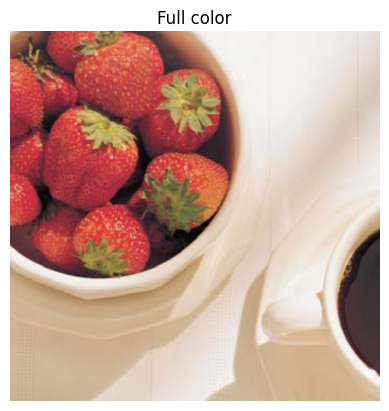

In [ ]:
#Leitura das imagens de morangos
img_rgb = imageio.imread('image_processing_tools/images/color_image_processing/strawberries.png')[:,:,:3]

plt.imshow(img_rgb)
plt.axis('off')
plt.title('Full color')
plt.show()

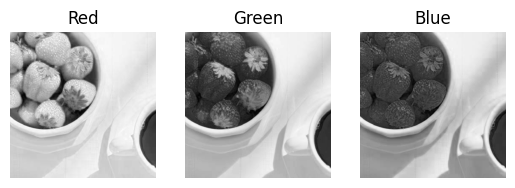

In [ ]:
fig_rgb,ax_rgb = plt.subplots(1,3)
rgb_names = ['Red', 'Green', 'Blue']

#Aprsentação dos canais RGB
for idx in range(3):
  ax_rgb[idx].imshow(img_rgb[:,:,idx], cmap='gray')
  ax_rgb[idx].axis('off')
  ax_rgb[idx].set_title(rgb_names[idx])

RGB:
$s_i = kr_i$

(array([ 57499., 353079., 154917., 144005., 287008., 508915., 538927.,
             0.,      0.,      0.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

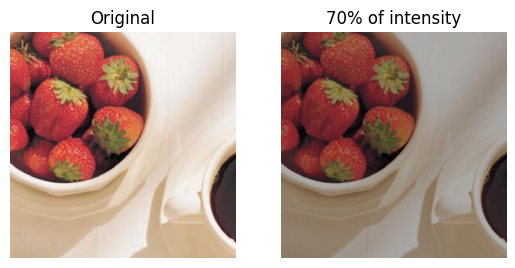

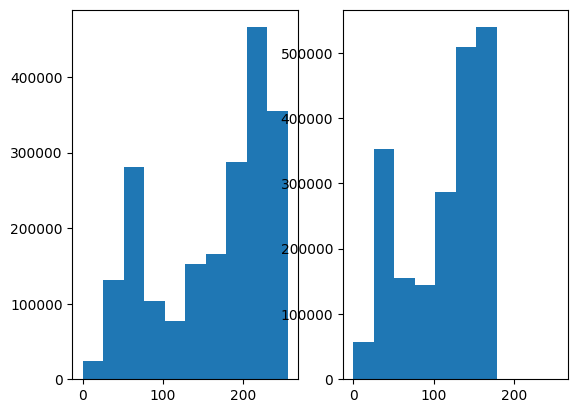

In [ ]:
# Definição da transformação acima através da função  apply_tranformation_rgb
def apply_tranformation_rgb(img_rgb, k):
  return np.array(np.floor(k * img_rgb), dtype=int)

# Aplicação da transformação
img_rgb_t = apply_tranformation_rgb(img_rgb, 0.7)


#Apresentação das imagens
fig_i,ax_i = plt.subplots(1,2)
ax_i[0].imshow(img_rgb)
ax_i[0].axis('off')
ax_i[0].set_title('Original')
ax_i[1].imshow(img_rgb_t)
ax_i[1].axis('off')
ax_i[1].set_title('70% of intensity')

fig_hist_i, ax_hist_i = plt.subplots(1,2)
ax_hist_i[0].hist(img_rgb.flatten(), range=[0,255])
ax_hist_i[1].hist(img_rgb_t.flatten(), range=[0,255])

HSI:
$s_3 = kr_3$,
$s_2 = r_2$,
$s_1 = r_1$

In [ ]:
# Definição da transformação para o modelo HSI
def apply_tranformation_hsi(img_hsi, k):
  h = img_hsi[:,:,0]
  s = img_hsi[:,:,1]
  i = img_hsi[:,:,2]

  new_i = k * i

  h = np.expand_dims(h, axis=-1)
  s = np.expand_dims(s, axis=-1)
  i = np.expand_dims(new_i, axis=-1) #Apenas o canal de intensidade será afetado

  hsi = np.concatenate((h,s,i), axis=-1)

  return hsi




In [ ]:
def rgb2hsi(img): # definição da função rgb2hsi, já vista na parte 01
    r = img[:,:,0]/255
    g = img[:,:,1]/255
    b = img[:,:,2]/255

    d_rg = r - g
    d_rb = r - b
    d_gb = g - b
    num = (d_rg + d_rb)/2
    den = np.sqrt(np.square(d_rg) + (d_rb*d_gb)) + 0.00001
    frac = num / den
    theta = np.arccos( frac )
    theta = (theta / np.pi)*180

    h = np.where(b <= g, theta, 360-theta)
    h = h/360

    s = 1 - (3/(r+g+b+0.000001))*np.minimum(np.minimum(r,g),b)

    i = (r+g+b)/3

    h = np.expand_dims(h, axis=-1)
    s = np.expand_dims(s, axis=-1)
    i = np.expand_dims(i, axis=-1)

    hsi = np.concatenate((h,s,i), axis=-1)

    return hsi

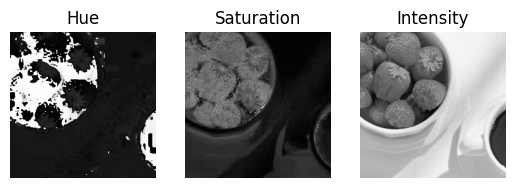

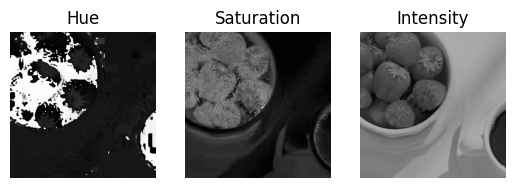

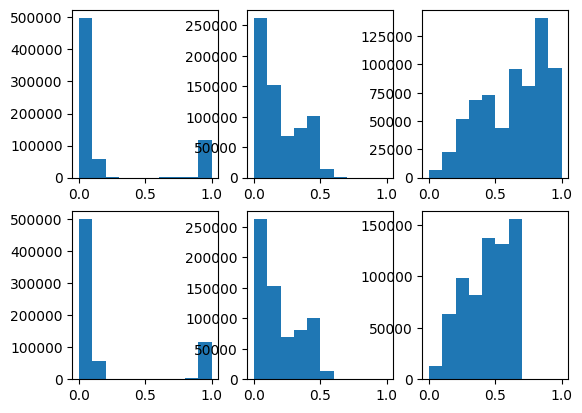

In [ ]:
# Applicação da função  de conversao rgb2hsi
img_hsi = rgb2hsi(img_rgb)
hsi_names = ['Hue', 'Saturation', 'Intensity']

fig_hsi,ax_hsi = plt.subplots(1,3)
fig_hsi_t,ax_hsi_t = plt.subplots(1,3)
fig_hist_hsi, ax_hist_hsi = plt.subplots(2,3)

# Apresentação dos canais originais HSI
for idx in range(3):
  ax_hsi[idx].imshow(img_hsi[:,:,idx], cmap='gray')
  ax_hsi[idx].axis('off')
  ax_hsi[idx].set_title(hsi_names[idx])
  ax_hist_hsi[0, idx].hist(img_hsi[:,:,idx].flatten(), range=[0,1])

# Aplicação da transformação
img_hsi_t = apply_tranformation_hsi(img_hsi, 0.7) #Aplicação sobre o canal de intensidade apenas

# Apresentação dos canais  HSI pós transformação
for idx in range(3):
  ax_hsi_t[idx].imshow(img_hsi_t[:,:,idx], cmap='gray', vmax=1)
  ax_hsi_t[idx].axis('off')
  ax_hsi_t[idx].set_title(hsi_names[idx])
  ax_hist_hsi[1,idx].hist(img_hsi_t[:,:,idx].flatten(), range=[0,1])

Aplicação da transformação sobre o modelo CMY: $s_i = kr_i + (1-k)$

In [ ]:
# Definição da função de transformação sobre
def apply_transformation_cmy(img_cmy, k):
  return k*img_cmy + (1-k)

(0.0, 1.0, 0.0, 1.0)

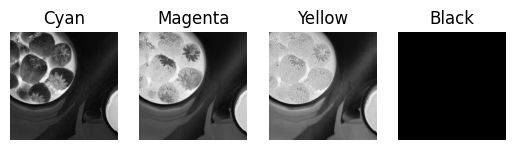

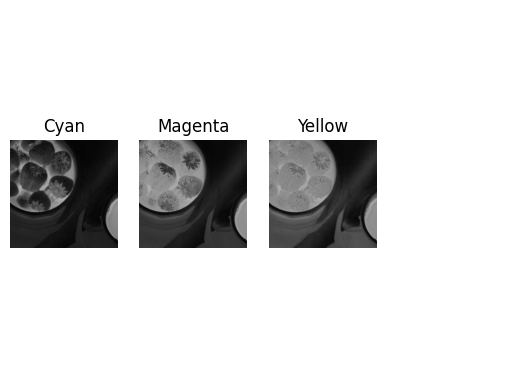

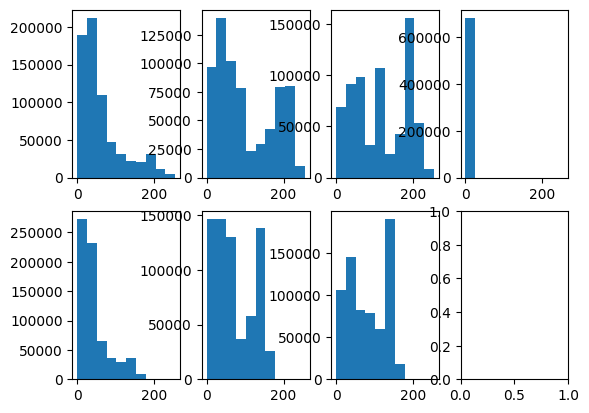

In [ ]:
#A imagem será carregada e transformada para o modelo CMYK
img_cmyk = Image.open('image_processing_tools/images/color_image_processing/strawberries.png').convert('CMYK')

cmyk_names = ['Cyan', 'Magenta', 'Yellow', 'Black']
fig_cmyk, ax_cmyk = plt.subplots(1,4)
fig_cmy_t, ax_cmy_t = plt.subplots(1,4)
fig_hist_cmyk, ax_hist_cmyk = plt.subplots(2,4)

#Apresentação dos 4 canais CMYK
for idx in range(4):
  ax_cmyk[idx].imshow(np.array(img_cmyk.getdata(idx)).reshape((img_cmyk.height, img_cmyk.width)), cmap='gray')
  ax_cmyk[idx].axis('off')
  ax_cmyk[idx].set_title(cmyk_names[idx])
  ax_hist_cmyk[0, idx].hist(np.array(img_cmyk.getdata(idx)), range=[0,255])

c = np.expand_dims(np.array(img_cmyk.getdata(0)).reshape((img_cmyk.height, img_cmyk.width)), -1)
m = np.expand_dims(np.array(img_cmyk.getdata(1)).reshape((img_cmyk.height, img_cmyk.width)), -1)
y = np.expand_dims(np.array(img_cmyk.getdata(2)).reshape((img_cmyk.height, img_cmyk.width)), -1)
img_cmy = np.concatenate((c,m,y), axis=-1)

# Aplicação da transformação sobre os canais CMY
img_cmy_t = apply_transformation_cmy(img_cmy, 0.7) #Nesse ponto a função é chamada e a transformação é executada

#Agora os canais CMY serão apresentados, bem como seus histogramas
for idx in range(3):
  ax_cmy_t[idx].imshow(img_cmy_t[:,:,idx], cmap='gray', vmax=255)
  ax_cmy_t[idx].axis('off')
  ax_cmy_t[idx].set_title(cmyk_names[idx])
  ax_hist_cmyk[1,idx].hist(img_cmy_t[:,:,idx].flatten(), range=[0,255])

ax_cmy_t[3].axis('off')

Complementos de cor

Text(0.5, 1.0, 'Complemento')

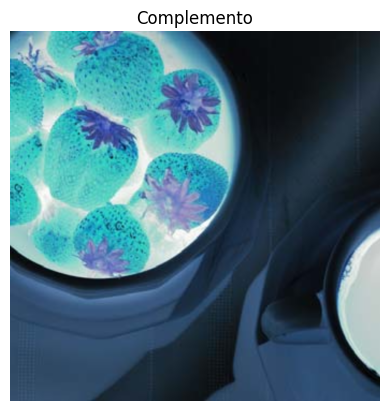

In [ ]:
img_comp = 255 - img_rgb

plt.imshow(img_comp)
plt.axis('off')
plt.title('Complemento')

Fatiamento de cores

(-0.5, 824.5, 825.5, -0.5)

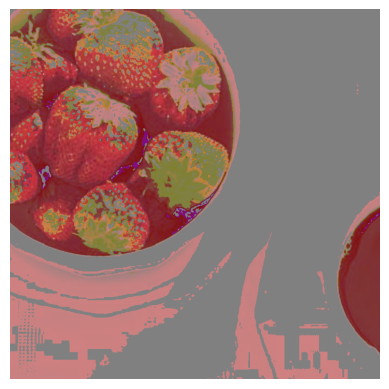

In [ ]:
def fatiamento(img, W, a):
  new_img = np.where(np.abs(img-a) > (W/2), (128,128,128), img)

  return new_img

img_fat = fatiamento(img_rgb, 65, (175, 41,49))

plt.imshow(img_fat)
plt.axis('off')

## Suavização

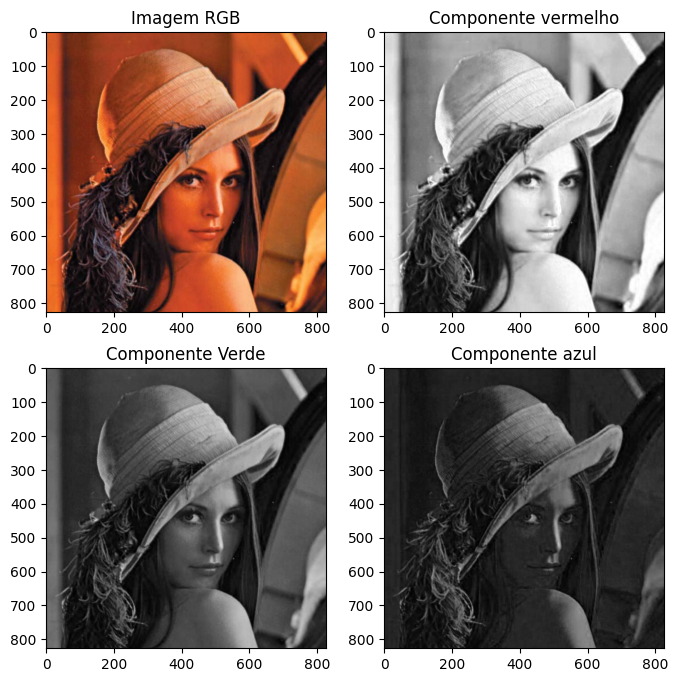

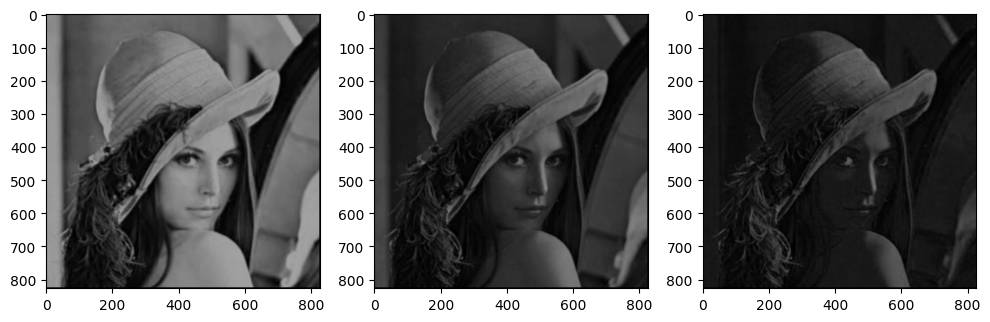

In [ ]:
#Leitura e armazenamento da imagem original
img_lena = imageio.imread('image_processing_tools/images/color_image_processing/lenna.png')

#Decomposição em cada canal r, g e b
r = img_lena[:,:,0]
g = img_lena[:,:,1]
b = img_lena[:,:,2]

#Apresentação da imagem original e suas componentes
fig,ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(img_lena)
ax[0,0].set_title('Imagem RGB')

ax[0,1].imshow(r, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Componente vermelho')

ax[1,0].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Componente Verde')

ax[1,1].imshow(b, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Componente azul')

res_r = np.zeros_like(r)
res_g = np.zeros_like(g)
res_b = np.zeros_like(b)

#Definição da máscara  s x t
s=5
t=5
#Definição do fator de normalização K =  5 x 5 = 25
K=25

#Processamento da suavização ao longo dos canais R, G  e B
for x in range(int(s/2), img_lena.shape[0]-int(s/2)):
  for y in range(int(t/2), img_lena.shape[1]-int(t/2)):
    res_r[x,y] = int(np.sum(r[x-int(s/2):x+int(s/2),y-int(t/2):y+int(t/2)])/K)
    res_g[x,y] = int(np.sum(g[x-int(s/2):x+int(s/2),y-int(t/2):y+int(t/2)])/K)
    res_b[x,y] = int(np.sum(b[x-int(s/2):x+int(s/2),y-int(t/2):y+int(t/2)])/K)


#Apresentação das imagens resultantes para cada canal após  asuavição

fig,ax=plt.subplots(1,3, figsize=(12,6))
ax[0].imshow(res_r, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(res_g, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(res_b, cmap='gray', vmin=0, vmax=255)

## Filtro de aguçamento: aplicação sobre cada canal e soma dos canais

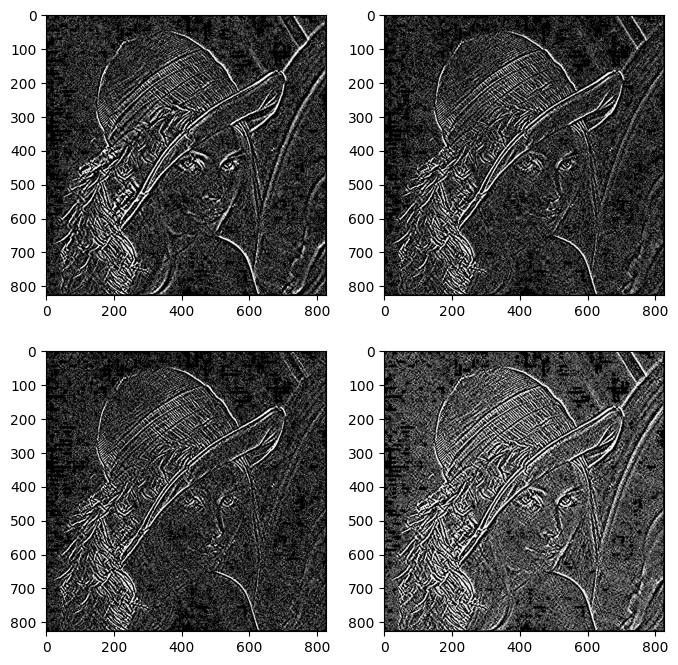

In [ ]:
# Aplicação de filtro gradiente 2x2: aplicação de 2 máscaras do filtro de Roberts
#Ref.: https://www.cs.cmu.edu/~16385/s17/Slides/4.0_Image_Gradients_and_Gradient_Filtering.pdf
filter = [[1,-1], [-1,1]]

# Loops sobre a imagem para aplicação do filtro/máscara acima
for x in range(img_lena.shape[0]-1):
  for y in range(img_lena.shape[1]-1):
    res_r[x,y] = np.sum(res_r[x:x+2, y:y+2] * filter)
    res_g[x,y] = np.sum(res_g[x:x+2, y:y+2] * filter)
    res_b[x,y] = np.sum(res_b[x:x+2, y:y+2] * filter)

# Soma da respostas
res = res_r+res_g+res_b

# Apresentação de cada uma das filtragens sobre os canais R, G e B e finalmente a soma das filtragens
fig,ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(res_r, cmap='gray')
ax[0,1].imshow(res_g, cmap='gray')
ax[1,0].imshow(res_b, cmap='gray')
ax[1,1].imshow(res, cmap='gray')